<font color = green >

# Neural Networks
</font>

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
%matplotlib notebook

In [25]:
from scipy.stats import logistic

<font color = green >

## Activation functions
</font>

<font color = green >

## Sigmoid
</font>

<IPython.core.display.Javascript object>


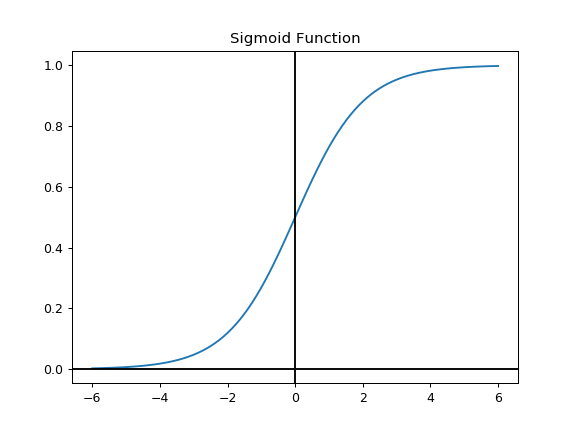

Text(0.5, 1.0, 'Sigmoid Function')

In [26]:
plt.figure()
x= np.linspace(-6,6,100)
y = logistic.cdf(x)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('Sigmoid Function')

<font color = green >

## Rectified Linear Unit (ReLU)
</font>

<IPython.core.display.Javascript object>


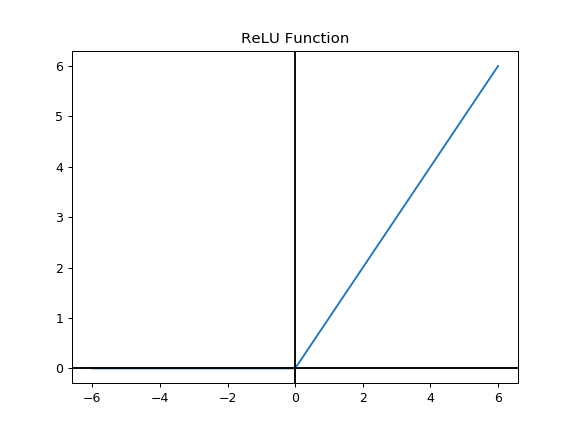

Text(0.5, 1.0, 'ReLU Function')

In [27]:
plt.figure()
x= np.linspace(-6,6,100)
y = np.maximum(x,0)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('ReLU Function')


<font color = green >

## Leaky ReLU
</font>

<IPython.core.display.Javascript object>


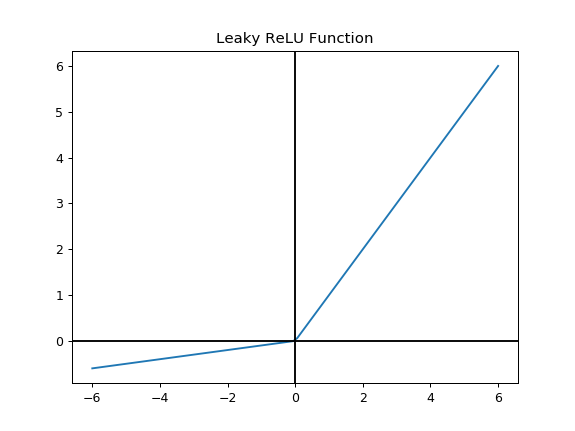

Text(0.5, 1.0, 'Leaky ReLU Function')

In [28]:
plt.figure()
x= np.linspace(-6,6,100)
y = np.maximum(x,0.1*x)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('Leaky ReLU Function')


<font color = green >

## Tanh 
</font>

<IPython.core.display.Javascript object>


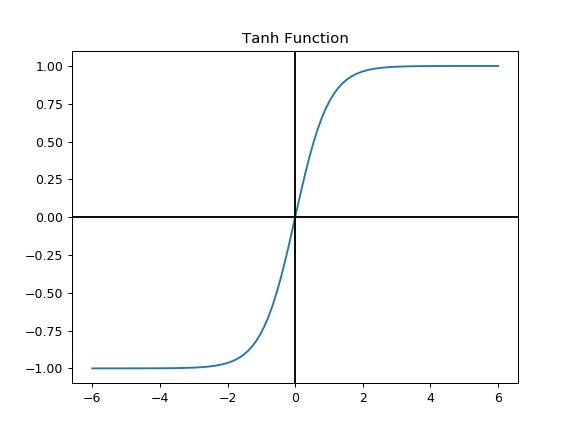

Text(0.5, 1.0, 'Tanh Function')

In [29]:
plt.figure()
x= np.linspace(-6,6,100)
y = np.tanh(x)
plt.plot (x,y)
ax= plt.gca()
# ax.set_aspect('equal')
# ax.grid(True, which='both') 

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title('Tanh Function')

<font color = green >

## Cat/Non-Cat dataset 
</font>

In [30]:
import h5py # common package to interact with a dataset that is stored on an H5 file.
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

In [31]:
def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [32]:
X_train,Y_train, X_test, Y_test, classes = load_dataset()

<IPython.core.display.Javascript object>


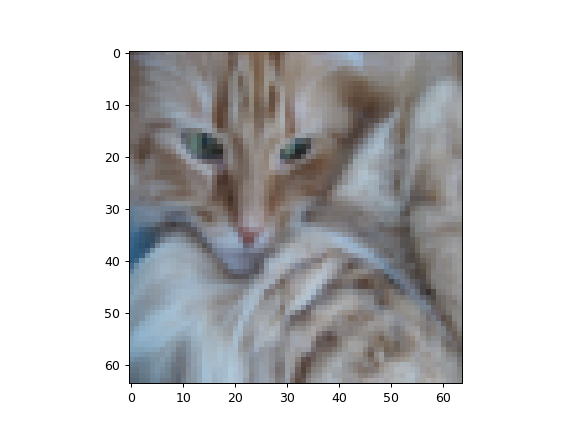

y = [1], it's a 'cat' picture.


In [33]:
index = 2
plt.figure()
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [12]:
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)


In [34]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)
print ('Y_train.shape=', Y_train.shape)
print ('Y_test.shape=', Y_test.shape)
print ('X_train_scaled.shape=', X_train_scaled.shape)

Y_train.shape= (209,)
Y_test.shape= (50,)
X_train_scaled.shape= (209, 12288)


<font color = green >

## Multi Layer Perceptron 
</font>

In [37]:
# Using Adam solver which is default in MLP is not good for small amount of data. 
clf= MLPClassifier(
    verbose= True,
    random_state=0,
    alpha = 10
)
clf.fit(X_train_scaled,Y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, Y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, Y_test)))


Iteration 1, loss = 10.49619750
Iteration 2, loss = 15.21328596
Iteration 3, loss = 7.94207362
Iteration 4, loss = 6.87453316
Iteration 5, loss = 5.86627447
Iteration 6, loss = 4.95218097
Iteration 7, loss = 4.14596854
Iteration 8, loss = 3.44518376
Iteration 9, loss = 2.85524901
Iteration 10, loss = 2.38281355
Iteration 11, loss = 2.00931505
Iteration 12, loss = 1.70447467
Iteration 13, loss = 1.45102735
Iteration 14, loss = 1.25869714
Iteration 15, loss = 1.14488722
Iteration 16, loss = 1.04320693
Iteration 17, loss = 0.94795506
Iteration 18, loss = 0.94278840
Iteration 19, loss = 0.84520056
Iteration 20, loss = 0.97437959
Iteration 21, loss = 1.47724554
Iteration 22, loss = 1.24817634
Iteration 23, loss = 0.80580590
Iteration 24, loss = 0.88042732
Iteration 25, loss = 0.84357128
Iteration 26, loss = 0.84644948
Iteration 27, loss = 0.84307375
Iteration 28, loss = 1.43113637
Iteration 29, loss = 1.14081348
Iteration 30, loss = 0.93966337
Iteration 31, loss = 0.70715187
Iteration 32, l

<font color = green>

###  Shallow Neural Network  (2 Layers)

</font>



In [38]:
clf= MLPClassifier(
    solver= 'lbfgs', 
    random_state=20,
    # hidden_layer_sizes=(100), # default value 
)
clf.fit(X_train_scaled,Y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, Y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, Y_test)))


train accuracy= 100.000%
test accuracy= 76.000%


<font color = green>

###  4 Layers Neural Network 

</font>



In [39]:
clf= MLPClassifier(
    solver= 'lbfgs',
    random_state=20,
    hidden_layer_sizes=(20,7,10),
#     alpha=.1, 
    max_iter=30,
)
clf.fit(X_train_scaled,Y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, Y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, Y_test)))


train accuracy= 89.474%
test accuracy= 80.000%


In [40]:
# random_state=20,
# hidden_layer_sizes=(20,7,10),
# max_iter=30,
# train accuracy= 88.038%
# test accuracy= 80.000%

<font color = green>

##  Synthetic Data

</font>



In [41]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [42]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers 

In [134]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
 
   
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    plt.title(title)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

        
    
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)


<IPython.core.display.Javascript object>


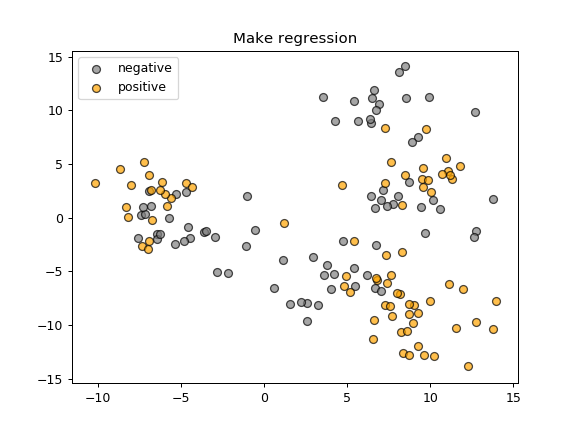

In [135]:
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8,cluster_std = 2, random_state = 4)
# X_mk8, y_mk8 = make_blobs( n_samples = 100, n_features = 2,centers = 8, cluster_std = 1.3,random_state = 4)

X_train, X_test, y_train, y_test  =  train_test_split(X_mk8, y_mk8 % 2, random_state= 0)
# y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]
plt.figure()
plot_data_logistic_regression(X_train,y_train, title= 'Make regression')

In [45]:
clf = MLPClassifier(
    solver= 'lbfgs',

).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))

train accuracy= 91.333%


<font color = green>

###  Single Layer Different Units Number 

</font>



<IPython.core.display.Javascript object>


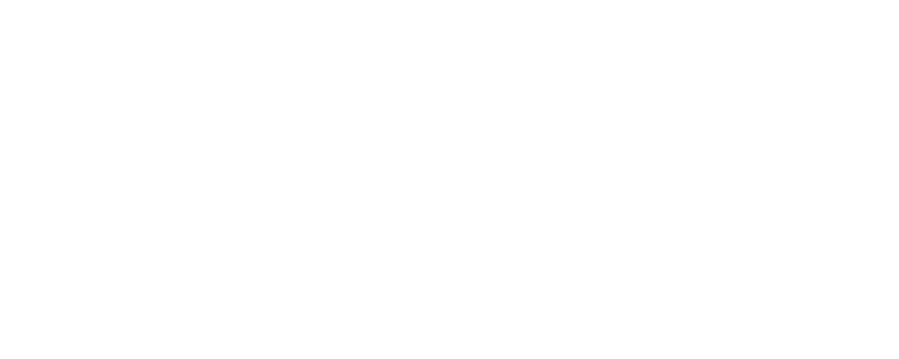

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [46]:
_, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize= (10,4))
axes = (ax1, ax2, ax3)
layer_dim  = (1,10,100)
for dim, ax in  zip(layer_dim, axes):    
    clf = MLPClassifier(hidden_layer_sizes=(dim),solver= 'lbfgs').fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)    
    plot_decision_boundary(clf, X_train, y_train,  X_test=X_test, y_test= y_test,title='1 layer {} unints. \nAccuracy_train = {:.0%} \nAccuracy_test = {:.0%}'.
                           format(dim, accuracy_train, accuracy_test),
                           precision=0.05, plot_symbol_size = 30, is_extended=False, ax= ax)
plt.tight_layout()

<font color = green>

###  Regularization

</font>



<IPython.core.display.Javascript object>


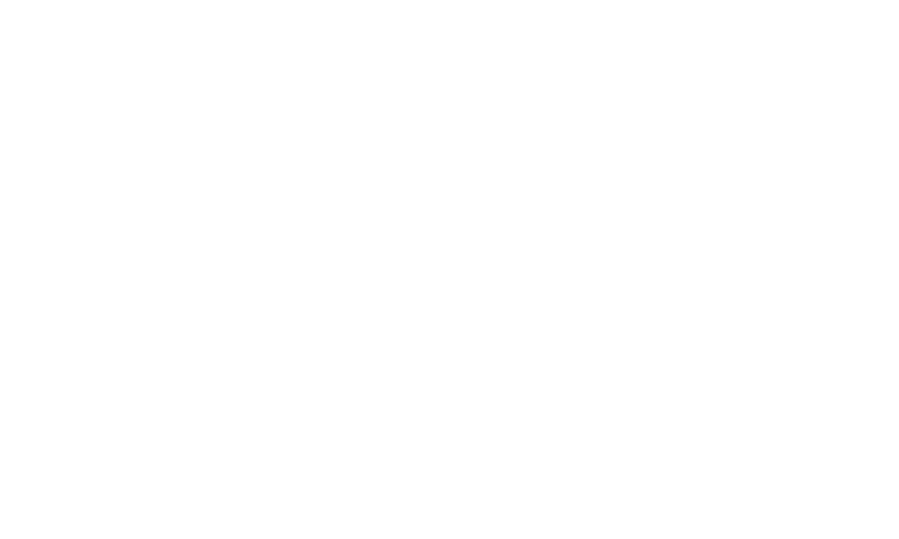

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [47]:
_, ((ax1, ax2)) = plt.subplots(1, 2, figsize= (10,6))
axes = (ax1, ax2)
alphas = (0.001, 5)
for alpha, ax in  zip(alphas, axes):    
    clf = MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver= 'lbfgs', 
        alpha=alpha,
        random_state = 0,       
        
    )
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
 
    plot_decision_boundary(clf, X_train, y_train,X_test=X_test, y_test=y_test, title='2 layers, alpha = {} . \nAccuracy_train = {:.0%} \nAccuracy_test = {:.0%}'.
                           format(alpha, accuracy_train, accuracy_test),
                           precision=0.05, plot_symbol_size = 30, is_extended=False, ax= ax)
plt.tight_layout()

<font color = green>

###  Activation Functions

</font>



<IPython.core.display.Javascript object>


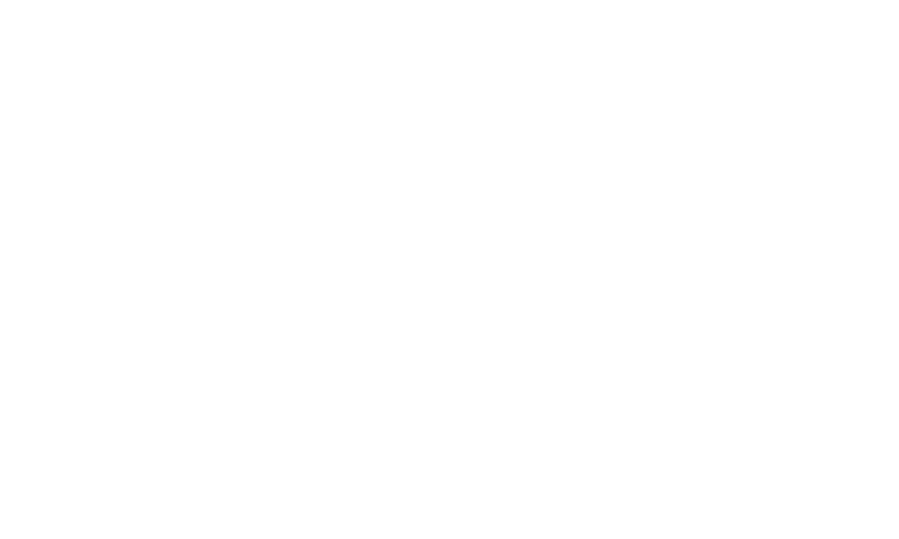

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [48]:
_, ((ax1, ax2)) = plt.subplots(1, 2, figsize= (10,6))
axes = (ax1, ax2)
activations = ('tanh', 'relu')
for activation, ax in  zip(activations, axes):    
    clf = MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver= 'lbfgs', 
        random_state = 0,
        activation = activation      
    )
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
 
    plot_decision_boundary(clf, X_train, y_train,X_test=X_test, y_test=y_test, title='2 layers, activation = {} . \nAccuracy_train = {:.0%} \nAccuracy_test = {:.0%}'.
                           format(activation, accuracy_train, accuracy_test),
                           precision=0.05, plot_symbol_size = 30, is_extended=False, ax= ax)
plt.tight_layout()

<font color = green>

##  Handwritten Digits

</font>



<font color = green>

###  Load the data 

</font>



In [49]:
from scipy.io import loadmat
fn=  os.path.join(path , 'digits.mat')
mat= loadmat(fn)
X = mat['X']
y = mat['y'].ravel()
y = y%10 # make 10 to 0 
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)


X_train.shape= (3750, 400)
X_test.shape= (1250, 400)
y_train.shape= (3750,)
y_test.shape= (1250,)


<font color = green>

###  Visualize the data

</font>



In [50]:
def draw_pixels_img(x, ax = None, title=None):
    '''
    :param x: ndarray - row
    '''

    img_width = int(np.sqrt(x.shape[0]))
    img_height = x.shape[0]/img_width
    try:
        data = x.reshape(img_width, -1).T
    except:
        SystemExit('Cannot compute the size of the picture')
    if ax:
        plt.sca(ax)
    else:
        plt.figure(figsize=(2, 2))
    plt.imshow(data, cmap='Greys', interpolation='nearest')
    plt.axis('off')
    if not title is None:
        plt.title(title)

<IPython.core.display.Javascript object>


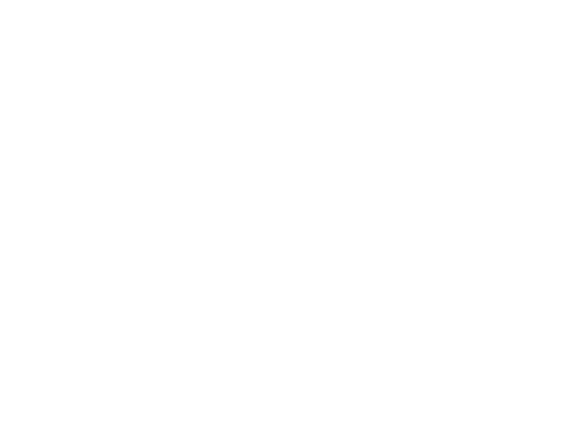

In [51]:
plt.figure()
for i in range (10): 
    for j in range (10):
        index = 500*i+j           
        ax = plt.subplot(10,10,i*10+j+1) 
        draw_pixels_img(X[index], ax)
plt.tight_layout(h_pad=-1) 


<font color = green>

###  Normalize the data

</font>



In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color = green>

###  Train model

</font>



In [55]:
clf = MLPClassifier(
    solver= 'lbfgs',
#     hidden_layer_sizes= (100,100),
    random_state = 10,
    alpha = 10
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

train accuracy= 100.000%
test accuracy= 94.400%


In [315]:
#     solver= 'lbfgs',
#     random_state = 10,
#     alpha = 10
# train accuracy= 100.000%
# test accuracy= 94.400%

<font color = green>

###  Visualize prediction

</font>



<IPython.core.display.Javascript object>


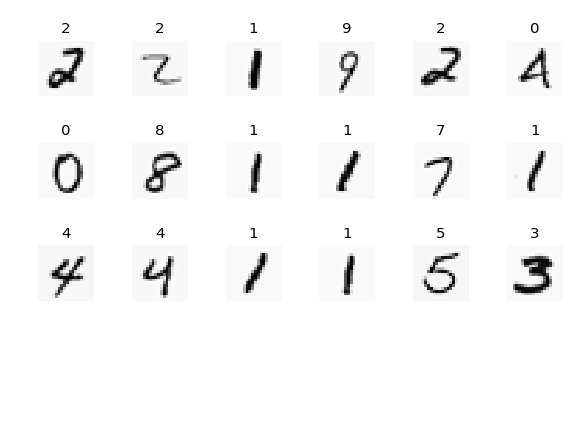

c:\python\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [56]:
def draw_digits_samples(X,n_rows= 10, n_cols = 10, y=None):
    indices = np.random.randint(0, len(X), n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            if y is None: 
                draw_pixels_img(X[indices[index]], ax)
            else:
                draw_pixels_img(X[indices[index]], ax, title=y[indices[index]])
    plt.tight_layout(h_pad=-1) 

plt.figure()
# draw_digits_samples(X_train,X_train_scaled, n_rows= 4, n_cols = 6, clf = clf)
predicted= clf.predict(X_test_scaled)
draw_digits_samples(X_test, n_rows= 4, n_cols = 6, y = predicted)



<font color = green >

## Home Task
</font>

<font color = green>

### Brest Cancer Dataset

</font>



In [58]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [108]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
X_train, X_test, y_train, y_test  =  train_test_split(X, y)
clf= MLPClassifier(
    solver= 'lbfgs',
#     hidden_layer_sizes= (100,100),
    random_state = 10,
    alpha = 4
).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))
# END_CODE 
    

train accuracy= 94.601%
test accuracy= 96.503%


<font color = green>

###  Signs dataset

</font>



In [109]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes


In [149]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [150]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=-1)


<IPython.core.display.Javascript object>


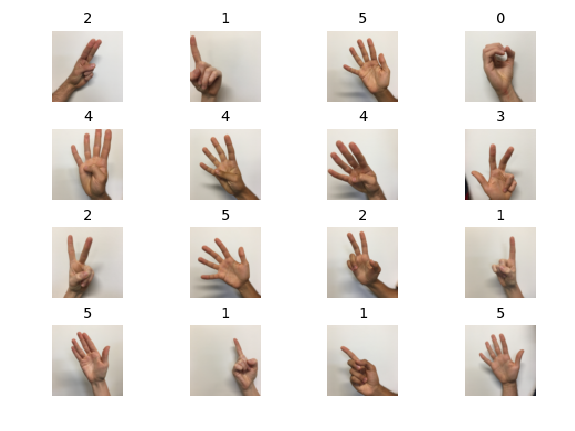

(1080,)

In [151]:
plt.figure()
display_samples_in_grid(X_train, n_rows=4, y= y_train)
y_train.shape

In [324]:
plt.gcf().canvas.set_window_title('Train set')

In [152]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

X_test.shape

(120, 12288)

In [158]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)
X_traini = X_train_flatten/255.
X_testi = X_test_flatten/255.
clf= MLPClassifier(
    solver= 'lbfgs',
    random_state = 10,
    alpha = 2
).fit(X_traini,y_train)
# print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
# print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))
# END_CODE     

<IPython.core.display.Javascript object>


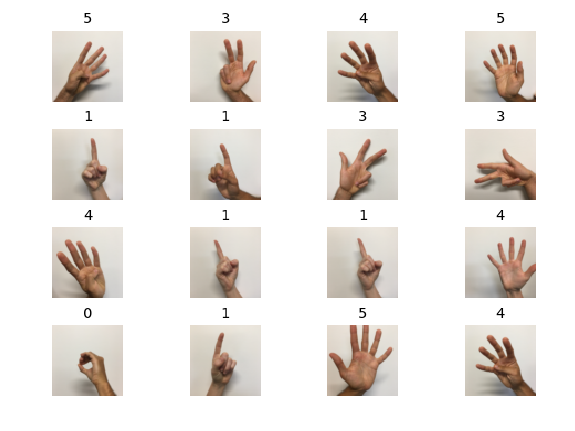

In [159]:
plt.figure()
predicted= clf.predict(X_testi)
display_samples_in_grid(X_test, n_rows=4, y= predicted)

In [160]:
plt.gcf().canvas.set_window_title('Test set prediction')